In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
from sklearn.preprocessing import MultiLabelBinarizer
%config InlineBackend.figure_formats = ['retina'] 

In [2]:
data_assignment = pd.read_csv("data/assignment_red.csv")
data_assignor = pd.read_csv("data/assignor_red.csv")
data_assignee = pd.read_csv("data/assignee_red.csv")
data_documentid = pd.read_csv("data/documentid_red.csv")

data_patents = pd.read_pickle('../info_patents')

#same dataframe with good Processing time values 
#some process_time_value where dates instead of int
data_patents_process = data_patents[data_patents['patent_processing_time'].apply(lambda x: str(x).isdigit())]
data_patents_process.patent_processing_time = data_patents_process.patent_processing_time.astype(int)
#data_patents_process = data_patents_process[data_patents_process['patent_processing_time'].apply(lambda x: x<20000)]

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
data_patents = data_patents.dropna()
s = data_patents['ipc_section']
mlb = MultiLabelBinarizer()
test = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data_patents.index)

test = test[['A','B','C','D','E','F','G','H']]
for i in list(test.columns) :
    data_patents[i] = test[i]

In [4]:
rf_id = data_assignment['rf_id']
data = data_assignment.copy()
data = data.join(data_assignee.set_index('rf_id'), on='rf_id')
data = data.join(data_assignor.set_index('rf_id'), on='rf_id')
data = data.join(data_documentid.set_index('rf_id'), on='rf_id')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20795 entries, 0 to 5834
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rf_id           20795 non-null  int64  
 1   file_id         20795 non-null  int64  
 2   cname           20795 non-null  object 
 3   caddress_1      20795 non-null  object 
 4   caddress_2      20795 non-null  object 
 5   caddress_3      12649 non-null  object 
 6   caddress_4      1335 non-null   object 
 7   reel_no         20795 non-null  int64  
 8   frame_no        20795 non-null  int64  
 9   convey_text     20795 non-null  object 
 10  record_dt       20795 non-null  object 
 11  last_update_dt  20795 non-null  object 
 12  page_count      20795 non-null  int64  
 13  purge_in        20795 non-null  object 
 14  ee_name         20795 non-null  object 
 15  ee_address_1    19669 non-null  object 
 16  ee_address_2    5307 non-null   object 
 17  ee_city         20784 non-null  

## Number of patents sold per assignor

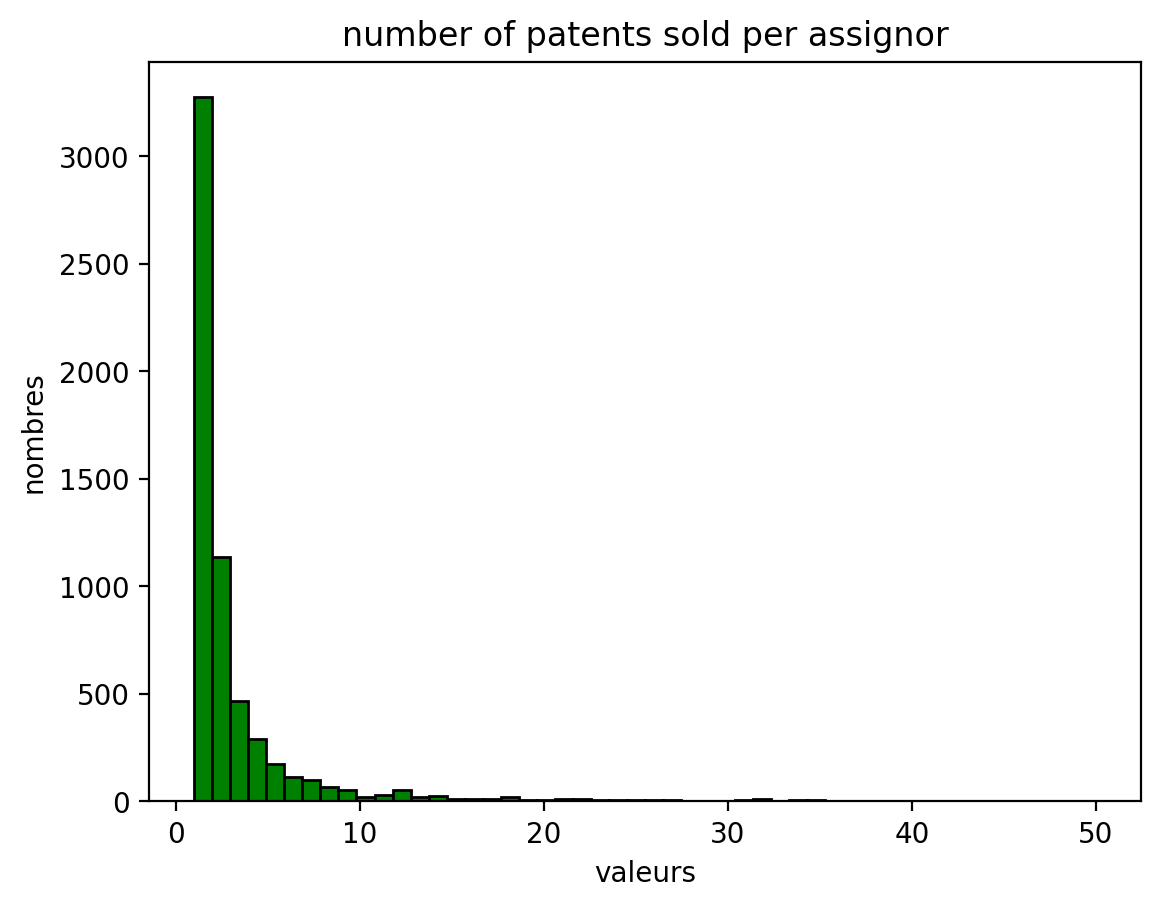

DescribeResult(nobs=6046, minmax=(1, 390), mean=3.4394641085014888, variance=86.03198409656105, skewness=18.25618805094915, kurtosis=586.130681602731)

In [38]:
plt.hist(data['or_name'].value_counts(), range = (1,50), bins = 50, color = 'green',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents sold per assignor')
plt.show()

stats.describe(data['or_name'].value_counts().to_numpy())

## Number of patents sold per assignee

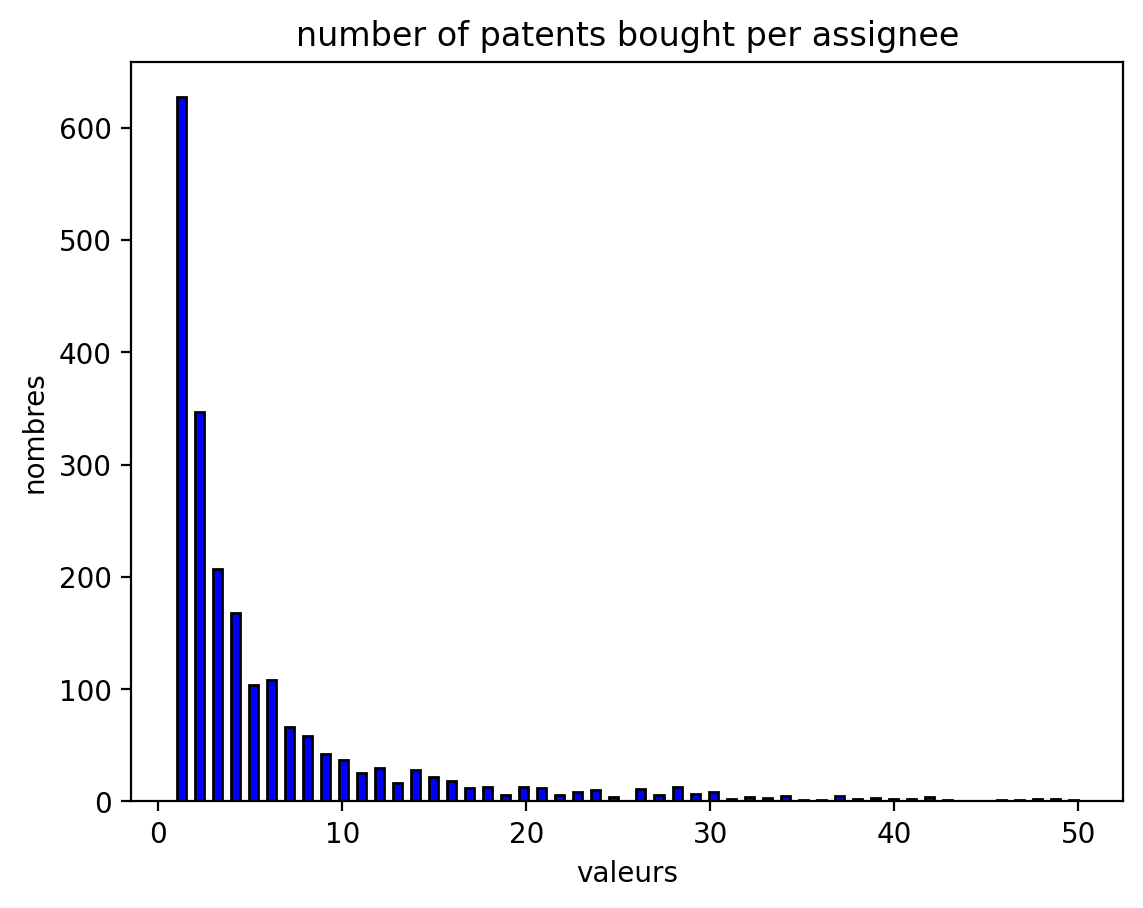

DescribeResult(nobs=2142, minmax=(1, 696), mean=9.708216619981325, variance=1010.9381762669258, skewness=12.140803748066828, kurtosis=198.37016358703715)

In [97]:
plt.hist(data['ee_name'].value_counts(), range = (1,50), bins = 100, color = 'blue',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('number of patents bought per assignee')
plt.show()

stats.describe(data['ee_name'].value_counts().to_numpy())

## Number of transactions with the same assignor/assignee

In [40]:
data['or_ee'] = data['or_name'] + data['ee_name']

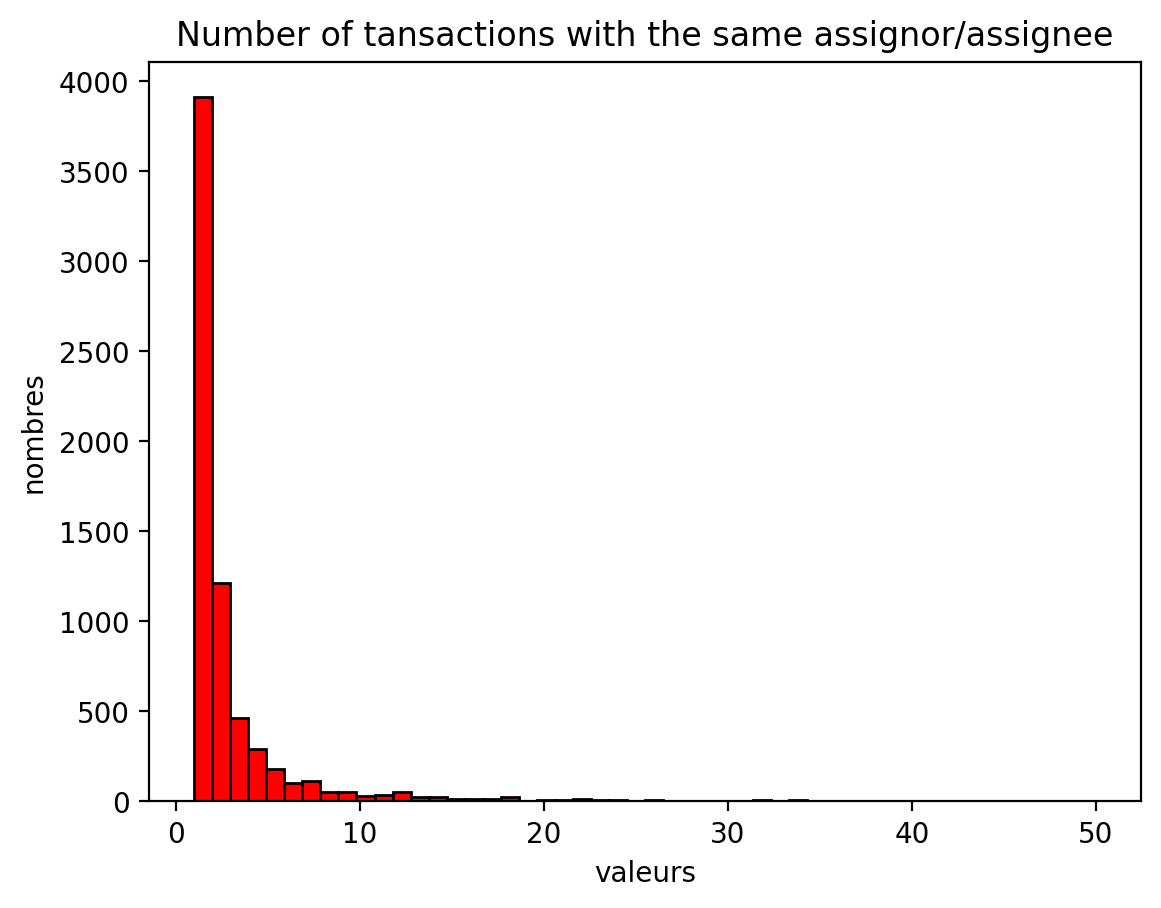

DescribeResult(nobs=6746, minmax=(1, 316), mean=3.082567447376223, variance=59.516235720060976, skewness=15.787077627428788, kurtosis=464.8336921322916)

In [41]:
plt.hist(data['or_ee'].value_counts(), range = (1,50), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

stats.describe(data['or_ee'].value_counts().to_numpy())

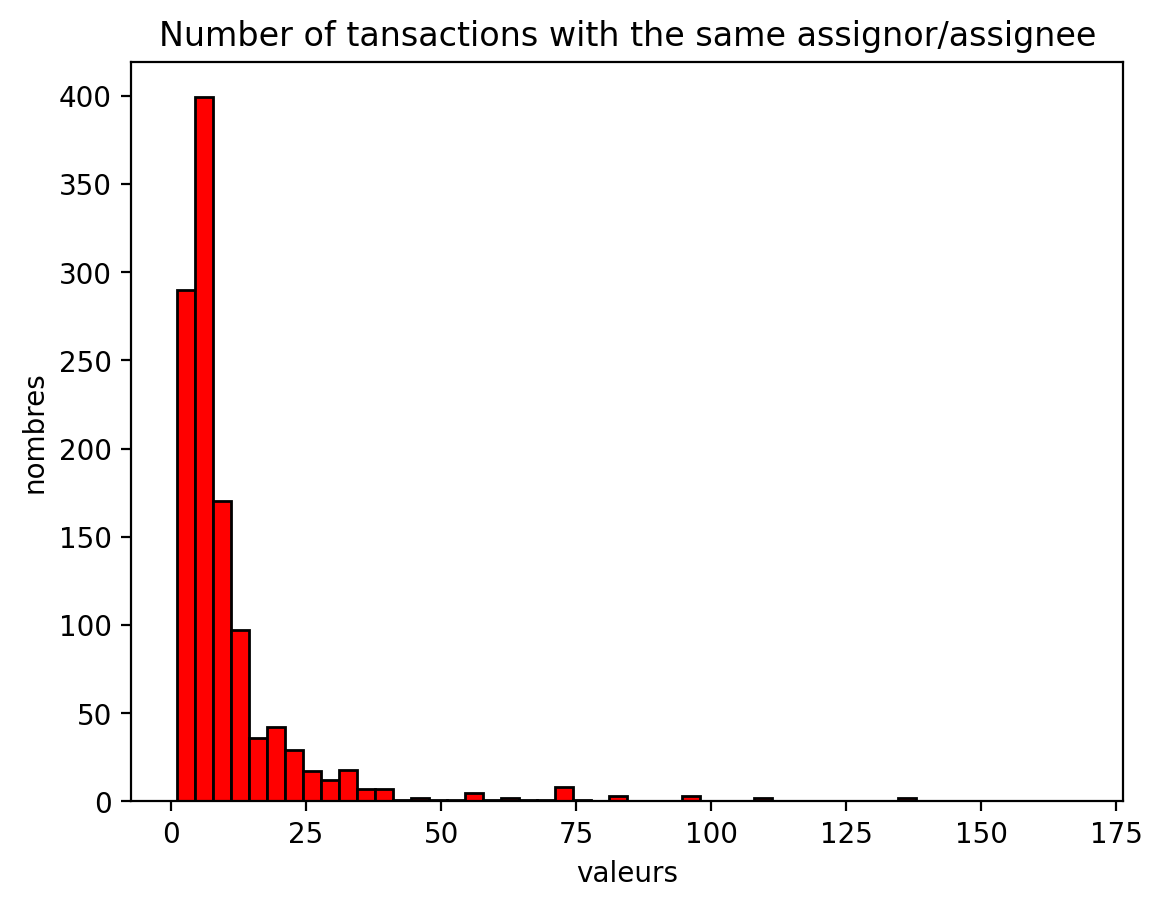

In [42]:
value_count = data['or_ee'].value_counts()
res = []
for i in range (len(value_count)):
    if value_count[i]>3 : 
        res.append(value_count[i])

plt.hist(res, range = (1,168), bins = 50, color = 'red',edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same assignor/assignee')
plt.show()

## Number of transactions with the same patent

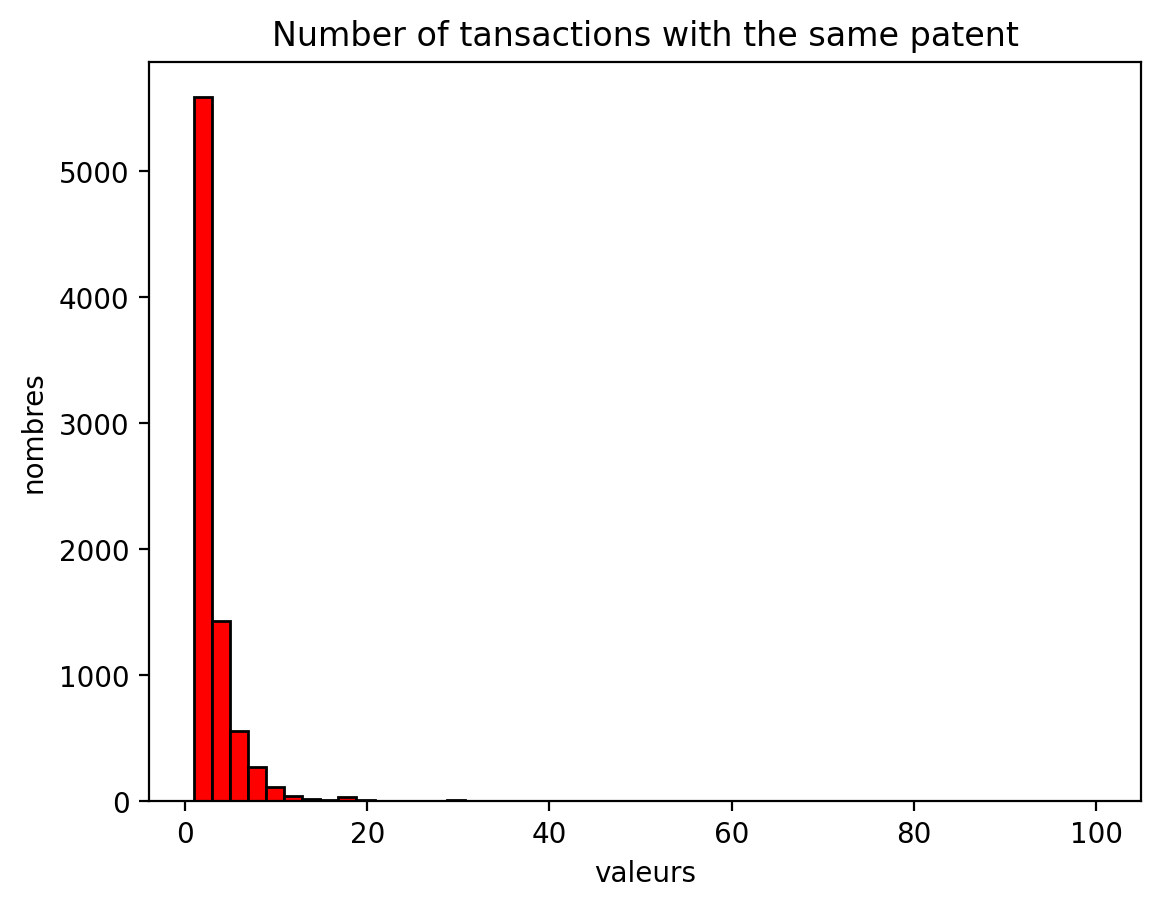

DescribeResult(nobs=8113, minmax=(1, 60), mean=2.563170220633551, variance=8.718426437614065, skewness=6.176965828374427, kurtosis=74.00897278937026)

In [43]:
plt.hist(data['grant_doc_num'].value_counts(), range = (1,100), bins = 50, color = 'red',
            edgecolor = 'black')
plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Number of tansactions with the same patent')
plt.show()

stats.describe(data['grant_doc_num'].value_counts().to_numpy())

We can see here that a patent that is traded is in average traded 6 times. 

============================================================================================

# All patents

In [44]:
data_patents['marked'].value_counts()

0.0    1800785
1.0      23266
Name: marked, dtype: int64

## Proportion of marked patents

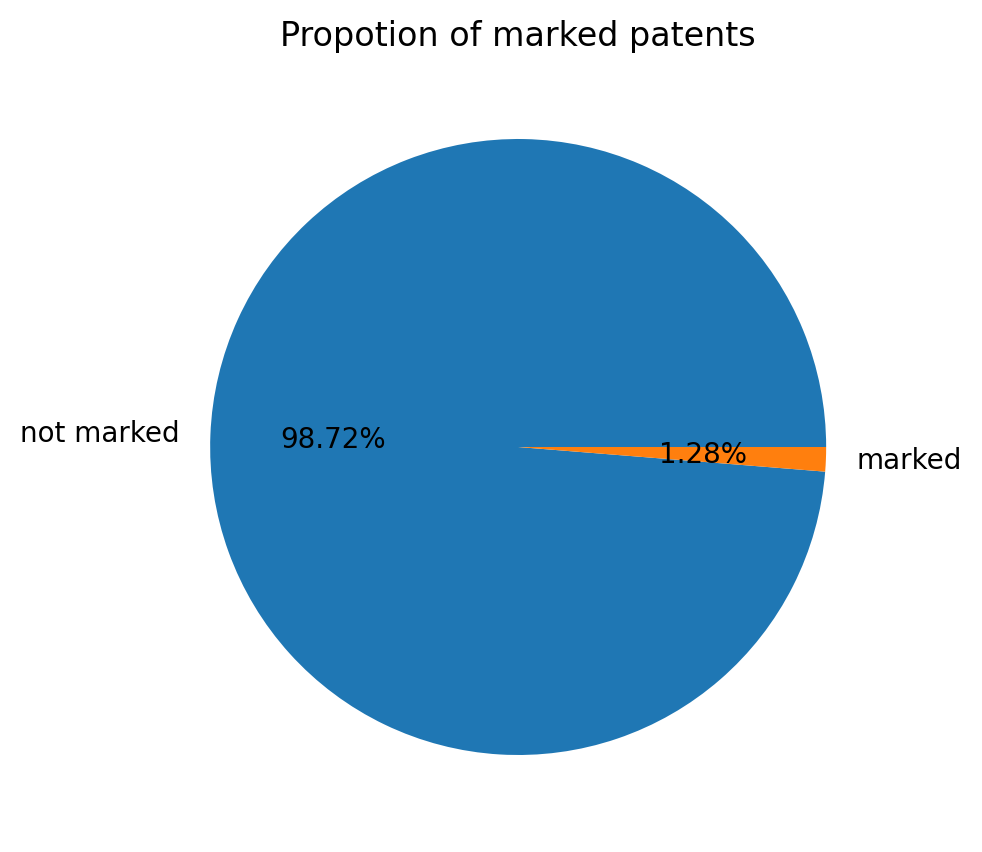

In [45]:
plt.figure(figsize=(5,5))
plt.pie(x = data_patents['marked'].value_counts(), labels = ['not marked','marked'], autopct='%1.2f%%')
plt.title('Propotion of marked patents')
plt.show()

## Processing Time for patents 

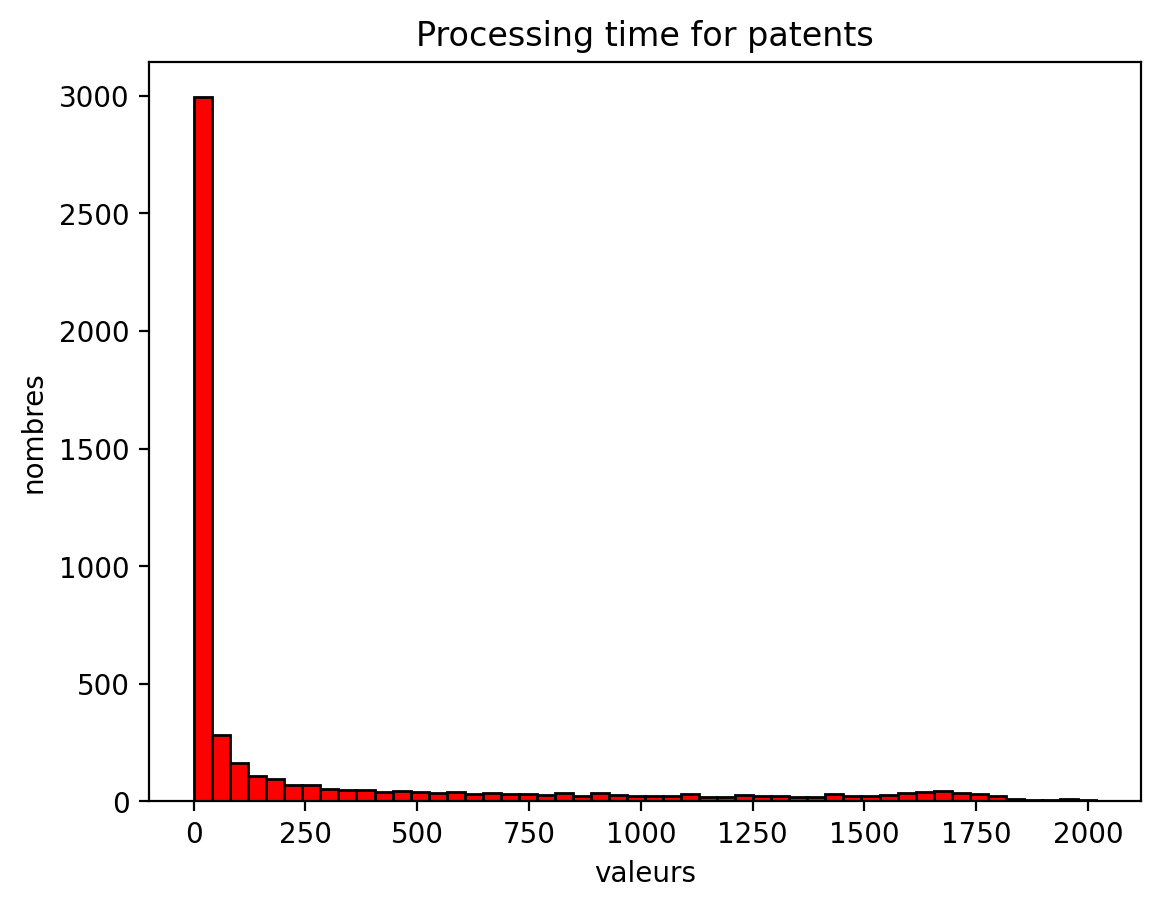

In [46]:
plt.hist(data_patents_process['patent_processing_time'].value_counts(), range = (1,2018), bins = 50, color = 'red',
            edgecolor = 'black')

plt.xlabel('valeurs')
plt.ylabel('nombres')
plt.title('Processing time for patents')
plt.show()

In [47]:
data_patents_process['patent_processing_time'].describe()

count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

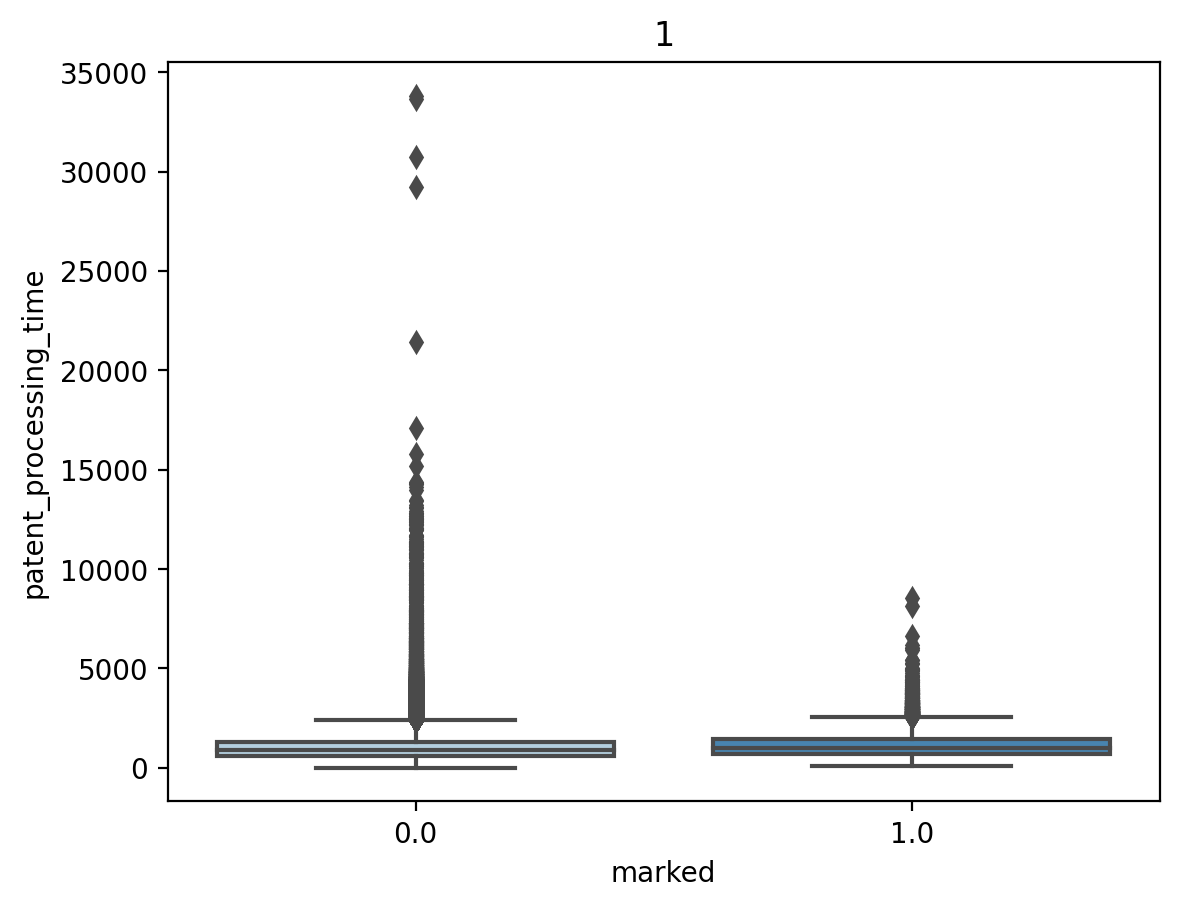

In [48]:
ax = sn.boxplot(x="marked", y="patent_processing_time", palette="Blues", data=data_patents_process).set_title("1")
                                                                                                                                                                                    

Here we see that the max is higher when the patent is not marked 

In [49]:
data_patents_process['patent_processing_time'].describe()

count    1.396111e+06
mean     1.046556e+03
std      6.163182e+02
min      0.000000e+00
25%      6.200000e+02
50%      9.070000e+02
75%      1.328000e+03
max      3.381700e+04
Name: patent_processing_time, dtype: float64

the processing time is in more than 50% of the time between 600 and 1400 days (the average being 1046 days) 

In [50]:
data_patents_process = data_patents[data_patents['patent_processing_time'].apply(lambda x: str(x).isdigit())]
data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)

<ipython-input-50-7a712afcf706>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_processing_time'] = data_patents_process['patent_processing_time'].astype(int)


In [51]:
data_patents_process['patent_date'] = pd.to_datetime(data_patents_process['patent_date'], format='%Y-%m-%d', errors='coerce')
data_patents_process.dropna()

<ipython-input-51-2d7efb1914e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['patent_date'] = pd.to_datetime(data_patents_process['patent_date'], format='%Y-%m-%d', errors='coerce')


,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0,1,0,1,0,0,0,0,0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0,0,0,0,0,0,0,0,1
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0,0,0,0,0,0,0,1,0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0,0,0,0,0,0,0,1,0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915705,8386822,2013-02-26,1852,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915707,4192319,1980-03-11,893,[A],[fa543ac8-5ee8-4999-b949-6c8a3dbae65d],[13],0.0,1,0,0,0,0,0,0,0
1915708,8386739,2013-02-26,1247,[G],[ee0168d9-bf74-4513-bfbf-e73c933f90e7],[6],0.0,0,0,0,0,0,0,1,0
1915709,4191891,1980-03-04,481,[H],[f2d3dc32-b29c-4c55-ab6d-736b4ee8b96b],[13],0.0,0,0,0,0,0,0,0,1


In [52]:
# creates a columns with only years

data_patents_process["year"] = data_patents_process['patent_date']
data_patents_process['year'] = pd.DatetimeIndex(data_patents_process['patent_date']).year

<ipython-input-52-419f6100beda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process["year"] = data_patents_process['patent_date']
<ipython-input-52-419f6100beda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_patents_process['year'] = pd.DatetimeIndex(data_patents_process['patent_date']).year


In [53]:
df_year2.index

Int64Index([1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='year')

In [59]:
new = data_patents_process.filter(['year','marked'], axis=1)
df_year=new.groupby('year').agg(['count'])
df_year2=new.groupby('year').agg(['sum'])
df_year['year'] = df_year['marked']
df_year['year'] = df_year.index

df_test = pd.DataFrame(columns = ('sum','total','year'), index = df_year.index)

df_test['sum'] = df_year2['marked']

df_test['total'] = df_year['marked']
df_test['year'] = df_year['year']
print(df_test)

         sum  total  year
year                     
1976     1.0   6954  1976
1977     0.0   6553  1977
1978     0.0   6144  1978
1979     1.0   4747  1979
1980     1.0   6476  1980
1981     0.0   8023  1981
1982     0.0   5427  1982
1983     0.0   6551  1983
1984     0.0   7289  1984
1985     0.0   7888  1985
1986     0.0   8893  1986
1987     0.0   9367  1987
1988     1.0   9883  1988
1989     2.0  12139  1989
1990     3.0  11131  1990
1991     7.0  12518  1991
1992     8.0  13272  1992
1993    16.0  14147  1993
1994    18.0  16565  1994
1995    34.0  16808  1995
1996    60.0  18332  1996
1997    94.0  20584  1997
1998   173.0  28368  1998
1999   304.0  29463  1999
2000   385.0  32483  2000
2001   475.0  30491  2001
2002   517.0  33156  2002
2003   681.0  34021  2003
2004   627.0  30927  2004
2005   564.0  29466  2005
2006   764.0  35961  2006
2007   753.0  33907  2007
2008   760.0  31908  2008
2009   918.0  36396  2009
2010  1320.0  45298  2010
2011  1527.0  47113  2011
2012  1768.0

In [67]:
df_test.total

year
1976     6954
1977     6553
1978     6144
1979     4747
1980     6476
1981     8023
1982     5427
1983     6551
1984     7289
1985     7888
1986     8893
1987     9367
1988     9883
1989    12139
1990    11131
1991    12518
1992    13272
1993    14147
1994    16565
1995    16808
1996    18332
1997    20584
1998    28368
1999    29463
2000    32483
2001    30491
2002    33156
2003    34021
2004    30927
2005    29466
2006    35961
2007    33907
2008    31908
2009    36396
2010    45298
2011    47113
2012    59548
2013    71099
2014    74262
2015    72643
2016    67498
2017    69832
2018    65607
2019    71281
2020    71240
Name: total, dtype: int64

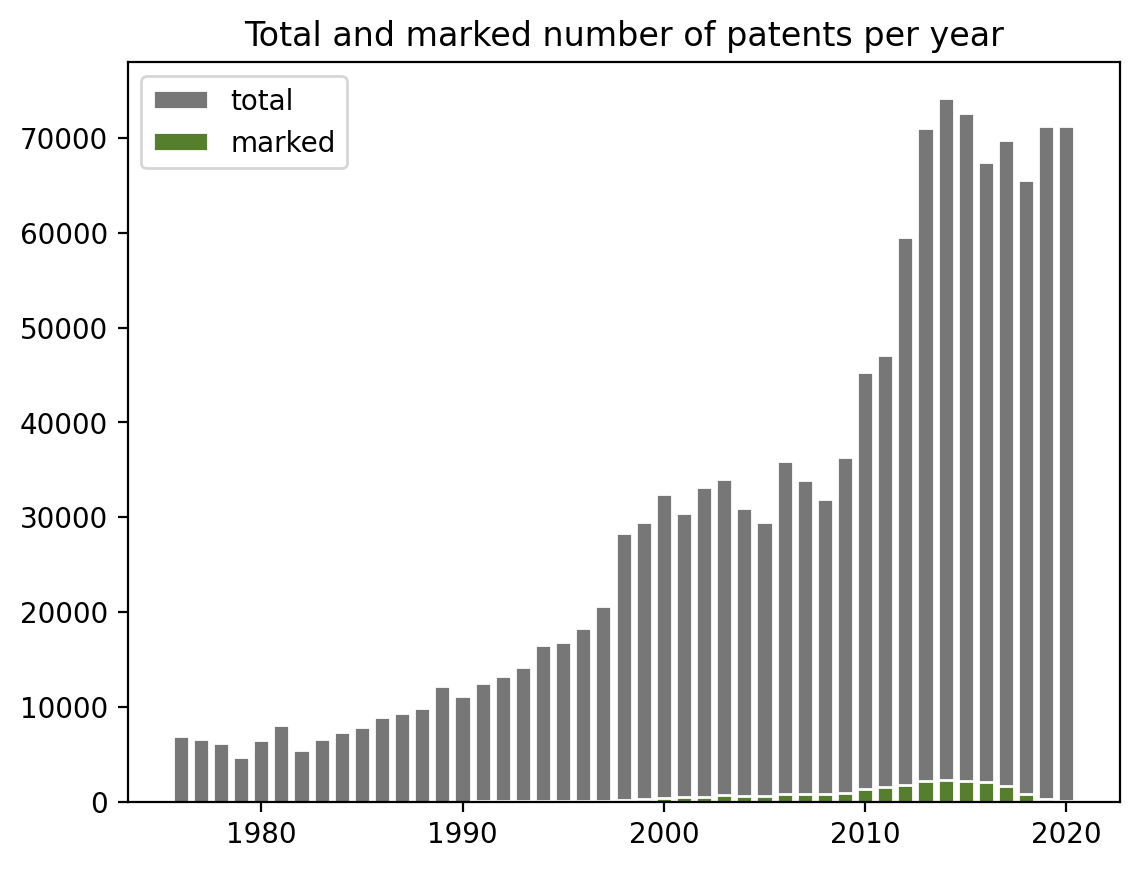

In [96]:
# set heights of bars
bars1 = list(df_test.total)
bars2 = list(df_test['sum'])

# Set position of bar on X axis
r1 = list(df_test.year)
r2 = list(df_test.year)
 
# Make the plot
plt.bar(r1, bars1, color='#777777', edgecolor='white', label='total')
plt.bar(r2, bars2, color='#557f2d', edgecolor='white', label='marked')
plt.title('Total and marked number of patents per year')
# Create legend & Show graphic
plt.legend()
plt.show()

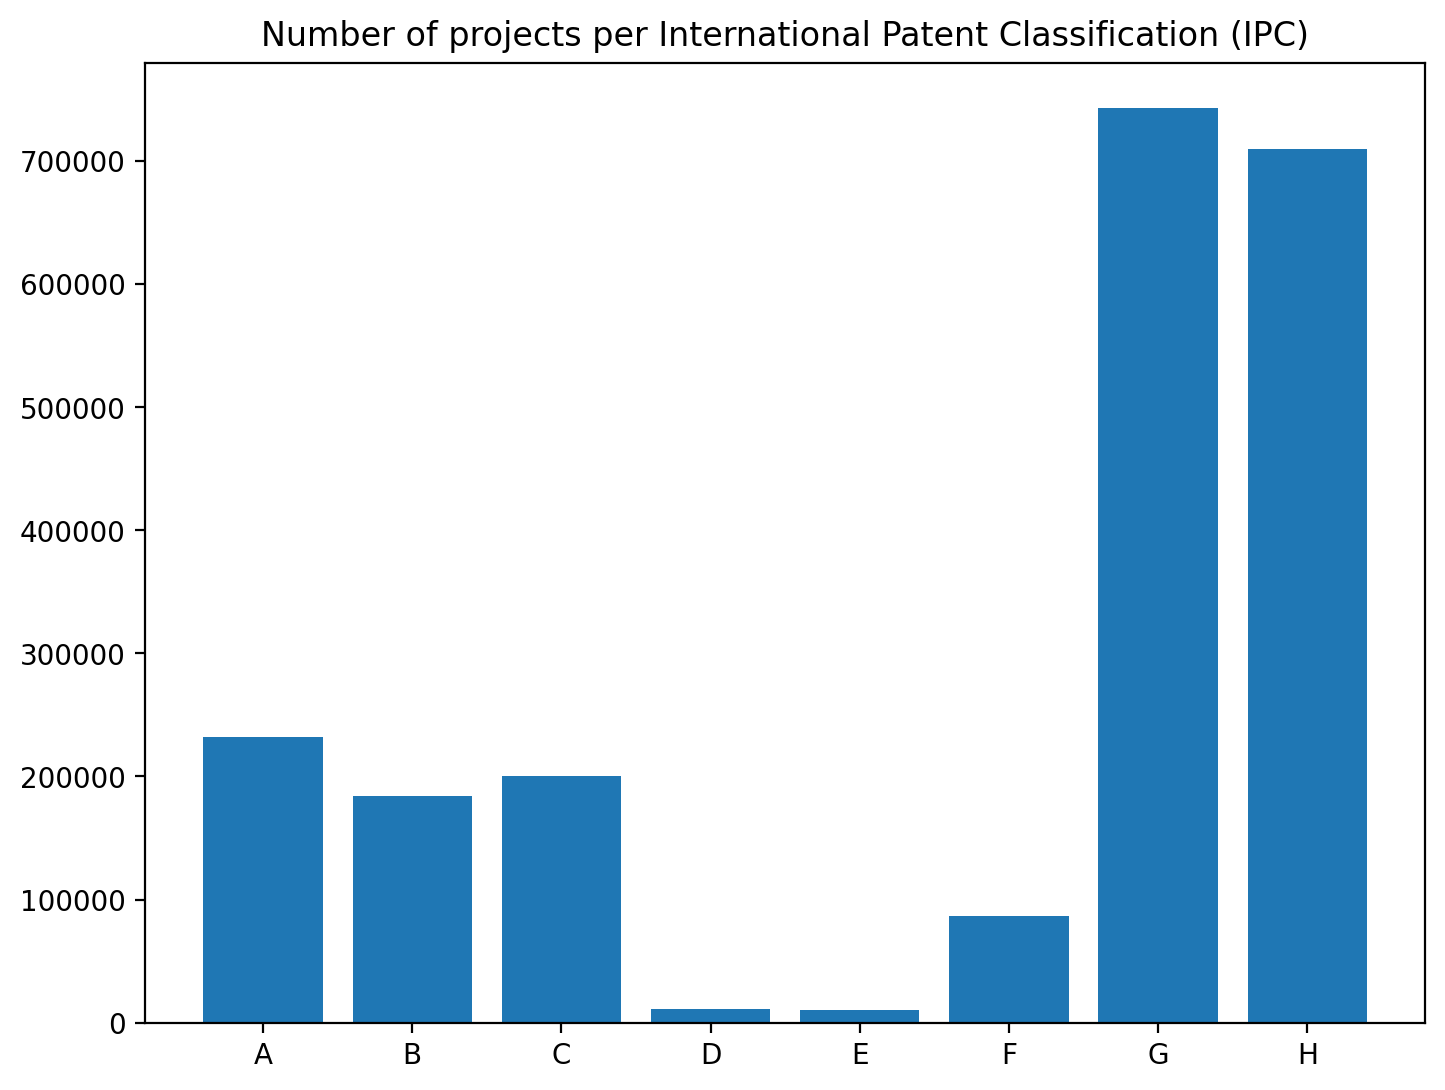

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['A', 'B', 'C', 'D', 'E', 'F','G','H']
students = [np.sum(data_patents.A),np.sum(data_patents.B),np.sum(data_patents.C),np.sum(data_patents.D),np.sum(data_patents.E),np.sum(data_patents.F),np.sum(data_patents.G),np.sum(data_patents.H)]
ax.bar(langs,students)
plt.title('Number of projects per International Patent Classification (IPC)')
plt.show()

A : HUMAN NECESSITIES

B : PERFORMING OPERATIONS; TRANSPORTING

C : CHEMISTRY; METALLURGY

D : TEXTILES; PAPER

E : FIXED CONSTRUCTIONS

F : MECHANICAL ENGINEERING; LIGHTING; HEATING; WEAPONS; BLASTING

G : PHYSICS

H : ELECTRICITY

In [ ]:
data_patents = data_patents.dropna()
s = data_patents['ipc_section']
mlb = MultiLabelBinarizer()
test = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=data_patents.index)

test = test[['A','B','C','D','E','F','G','H']]
for i in list(test.columns) :
    data_patents[i] = test[i]

In [ ]:
# A = Human Necessitates; B = Performing Operations; Transporting; C = Chemistry; Metallurgy, D = Textiles; Paper; E = Fixed Constructing, F = Mechanical Engineering; Lighting; Heating; Weapons; Blasting; G = Physics, H = Electricity